# Sequence expression from the Malva Index

## 1. Login and Connecting to the Malva Index

From the previous notebook `00_setup_malva_client.ipynb`, paste here the `API_TOKEN` you got from us, or if you login with ORCID, generate a new one from your user profile in [https://malva.mdc-berlin.de](https://malva.mdc-berlin.de)

In [ ]:
API_TOKEN = "" # place your API token here

Then, you are ready to use the `malva_client`

In [ ]:
import dnaio
from malva_client import MalvaClient
from malva_client.tools import mask_sequence

client = MalvaClient("https://malva.mdc-berlin.de", API_TOKEN)

INFO:malva_client.client:Connected to Malva API: healthy
INFO:malva_client.client:Authenticated successfully: free account


## 2. Querying the Malva Index

Malva enables sequence searches across our harmonized index of >7,000 samples. This enables:

- **Cross-study comparisons**: Identify expression patterns across diverse experimental conditions
- **Rare event detection**: Find low-frequency sequences that would be missed in individual studies
- **Metadata-driven analysis**: Leverage rich sample annotations for targeted queries
- **Real-time quantification**: Instantaneous results without reprocessing raw data

Each query returns not just expression levels, but complete information linking back to the original cells and samples for downstream analysis.

In this notebook, we use `client.search` which aggregates the information per cell type and sample. In the notebook `03_projecting_to_cells.ipynb`,
we will use `client.search_cells` which retrieves all original cell identifiers, so they can be projected together with the rest of gene expression
matrices, to enable sequence-to-gene expression correlation analysis.

### 2.1 Querying gene(s)

As before, we can perform querying of specific genes across these data by providing specific gene IDs. Check your favourite gene here.

In [3]:
results = client.search("CD3D")
print(results)

INFO:malva_client.client:Search completed with job ID: 93275093-2689-47f3-9c5f-8294d4b5c765


🔬 Malva Search Results
📊 Total cells: 4,563,690
📊 Sample/cell_type combinations: 33389
🧬 Genes/sequences: 1
🧪 Samples: 5818
🔬 Cell types: 280
📈 Expression range: 0.000 - 9715.147
📊 Mean expression: 11.223

ℹ️  Basic expression data only
💡 Run .enrich_with_metadata() to add sample metadata for filtering by:
   • Organ, disease, species
   • Study, laboratory, protocol
   • Age, sex, development stage

🔍 Available methods:
   • .filter_by(organ='brain', disease='normal')
   • .aggregate_by('cell_type')
   • .plot_expression_by('organ')
   • .available_filter_fields()


The `plot_expression_summary()` function provides an overview of query results, aggregating expression across major cell types in our harmonized atlas. This visualization helps:

- Assess the biological relevance of your query
- Identify unexpected expression patterns
- Guide more targeted follow-up analyses
- Validate known expression profiles

/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = (self._df.groupby(group_by)['norm_expr']
/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:422: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = plot_data.groupby(group_by)['cell_count'].sum().reindex(top_categories)



📊 Summary for Cell Type:
--------------------------------------------------
CD8_T_cell: 1668 samples, 1,051,682 cells, μ=77.009
CD4_T_cell: 726 samples, 497,419 cells, μ=43.989
T_cell: 275 samples, 44,051 cells, μ=40.723
naive_T_cell: 227 samples, 93,950 cells, μ=29.788
NKT_cell: 414 samples, 94,327 cells, μ=26.840
T_helper_cell: 125 samples, 39,769 cells, μ=25.396
cDC1_dendritic_cell: 332 samples, 98,694 cells, μ=23.991
gamma_delta_T_cell: 255 samples, 77,120 cells, μ=22.973
memory_T_cell: 61 samples, 18,278 cells, μ=20.706
cytotoxic_T_cell: 290 samples, 126,976 cells, μ=18.891


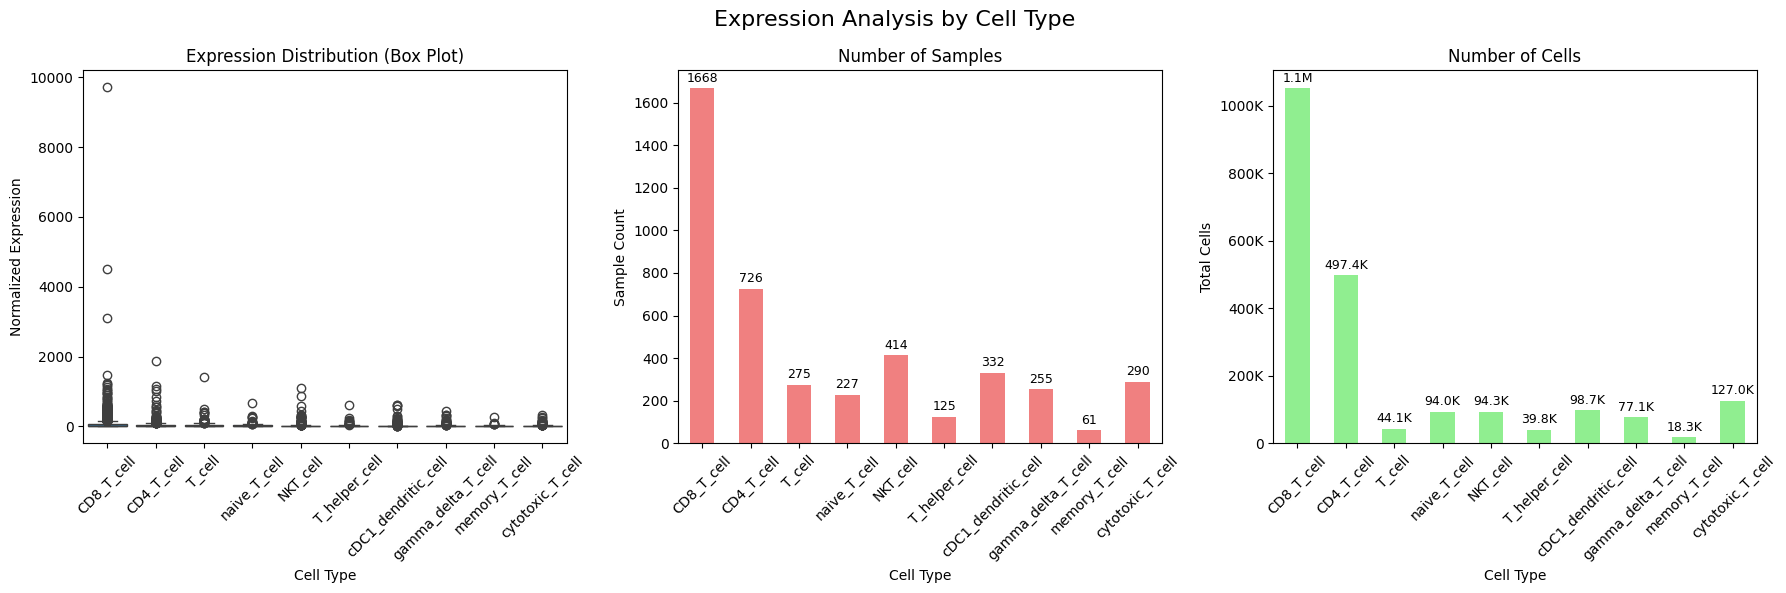

In [4]:
fig = results.plot_expression_summary("cell_type")

The results overview shows you a quick summary of what Malva could find from your query. This provides an overview of the cells that express this phenotype, aggregated per cell type. One can retrieve the relevant metadata to do more sophisticated filtering, e.g., by tissue, sample...

In [5]:
results.enrich_with_metadata()

✓ Enriched with metadata for 5818 samples (4,563,690 total cells)
✓ Extracted sample counts per cell type: 280 cell types


Total cells:,"33,389"
Genes/sequences:,1
Samples:,5818
Cell types:,280
Expression range:,0.000 - 9715.147
Mean expression:,11.223


We can check specific metadata variables like study title...

In [6]:
results['study_title']

0        Human oral mucosa cell atlas reveals a stromal...
1        A spatially resolved single-cell genomic atlas...
2        Single-cell RNA-seq reveals cell type-specific...
3        Single-cell RNA-seq reveals ectopic and aberra...
4        An organoid and multi-organ developmental cell...
                               ...                        
33384    A cell atlas of human thymic development defin...
33385    A cell atlas of human thymic development defin...
33386    Mapping the developing human immune system acr...
33387    Cross-tissue immune cell analysis reveals tiss...
33388    Regenerative lineages and immune-mediated prun...
Name: study_title, Length: 33389, dtype: category
Categories (221, object): ['A Cellular Anatomy of the Normal Adult Human ..., 'A Single-Cell Transcriptomic Atlas of Human S..., 'A cell atlas of human thymic development defi..., 'A human breast atlas integrating single-cell ..., ..., 'Ureter single-cell and spatial mapping reveal..., 'Using single-

#### 2.1.1 Basic results handling operations

Since the `results` output is backed by a `DataFrame`, we can perform any aggregation and filtering operations very efficiently, across any layers of metadata that are available.

In [7]:
results.aggregate_by("cell_type", agg_func="mean").head(20)

/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


,cell_type,mean_norm_expr,n_observations,total_cells,n_samples
3,CD8_T_cell,77.009446,1668,1051682,1668
2,CD4_T_cell,43.989345,726,497419,726
14,T_cell,40.723166,275,44051,275
178,naive_T_cell,29.787656,227,93950,227
11,NKT_cell,26.840244,414,94327,414
16,T_helper_cell,25.396106,125,39769,125
43,cDC1_dendritic_cell,23.991023,332,98694,332
103,gamma_delta_T_cell,22.973190,255,77120,255
160,memory_T_cell,20.705826,61,18278,61
77,cytotoxic_T_cell,18.891277,290,126976,290


In [8]:
# filtering by specific metadata
filter_data = results.filter_by(disease='normal', organ='brain')
avg_by_celltype = filter_data.aggregate_by('cell_type')

ℹ️  Could not extract true sample counts per cell type


/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


### 2.2 Looking for sequences

Malva enables detection of sequences absent from standard references:

- Viral sequences: Detect active infections, latent viral transcripts, or contamination
- Bacterial transcripts: Identify microbiome signatures in tissue samples
- Circular RNAs: Find back-splicing events missed by linear mapping
- Novel junctions: Discover rare splicing events or fusion transcripts
- Endogenous retroviruses: Quantify normally silenced repetitive elements

**Note: Sequence Masking Strategy**
The optional `mask_sequence()` function removes low-complexity regions that can cause:

- Over-quantification of highly repetitive k-mers
- False positive matches due to simple sequence repeats
- Reduced specificity in sequence identification

Consider masked vs. unmasked queries to optimize sensitivity vs. specificity for your specific application

In [9]:
with dnaio.open("rna.fna") as f_in:
    for s in f_in:
        seq = s.sequence
        break # we load only the first sequence

In [10]:
# seq = mask_sequence(seq) # optional, will remove low complexity sequences
# the mask_sequence requires that you install BLAST locally
results = client.search(seq)
print(results)

INFO:malva_client.client:Search completed with job ID: aa19cc62-9ea0-4032-8cdd-c94b9f67bbe8


🔬 Malva Search Results
📊 Total cells: 508,144
📊 Sample/cell_type combinations: 38210
🧬 Genes/sequences: 1
🧪 Samples: 6373
🔬 Cell types: 306
📈 Expression range: 0.000 - 1161.389
📊 Mean expression: 2.595

ℹ️  Basic expression data only
💡 Run .enrich_with_metadata() to add sample metadata for filtering by:
   • Organ, disease, species
   • Study, laboratory, protocol
   • Age, sex, development stage

🔍 Available methods:
   • .filter_by(organ='brain', disease='normal')
   • .aggregate_by('cell_type')
   • .plot_expression_by('organ')
   • .available_filter_fields()


In [11]:
results.enrich_with_metadata()

✓ Enriched with metadata for 6373 samples (508,144 total cells)
✓ Extracted sample counts per cell type: 306 cell types


Total cells:,"38,210"
Genes/sequences:,1
Samples:,6373
Cell types:,306
Expression range:,0.000 - 1161.389
Mean expression:,2.595


/local/malva/envs/dleonpe/miniforge3/envs/malva_api_new/lib/python3.11/site-packages/malva_client/models.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sort_values = plot_data.groupby(group_by)['norm_expr'].mean()


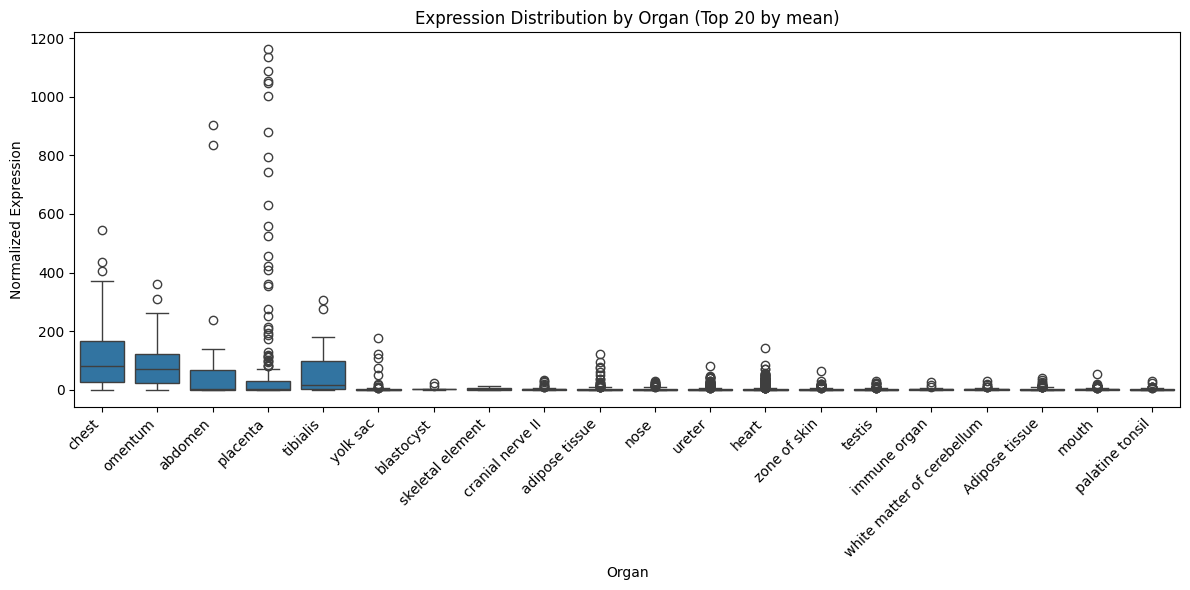

In [12]:
fig = results.plot_expression_by("organ", limit=20)